In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

In [3]:
def calculate_function(f, x):
    r = 0*x
    for (a, freq, shift) in f:
        r += a*np.sin(freq*np.pi*(x + shift))
    return r

def generate_function(harmonics):
    functions_idx = np.floor(np.random.uniform(0, len(harmonics)-1, 50)).astype(int)
    params = []
    for i in functions_idx:
        if i == 0:
            continue
        a = np.random.normal(0, 0.1)
        shift = np.random.uniform(0, 2*np.pi)
        params.append((a*(1/harmonics[i]), harmonics[i], shift))
    f = lambda z: calculate_function(params, z)
    return f


90


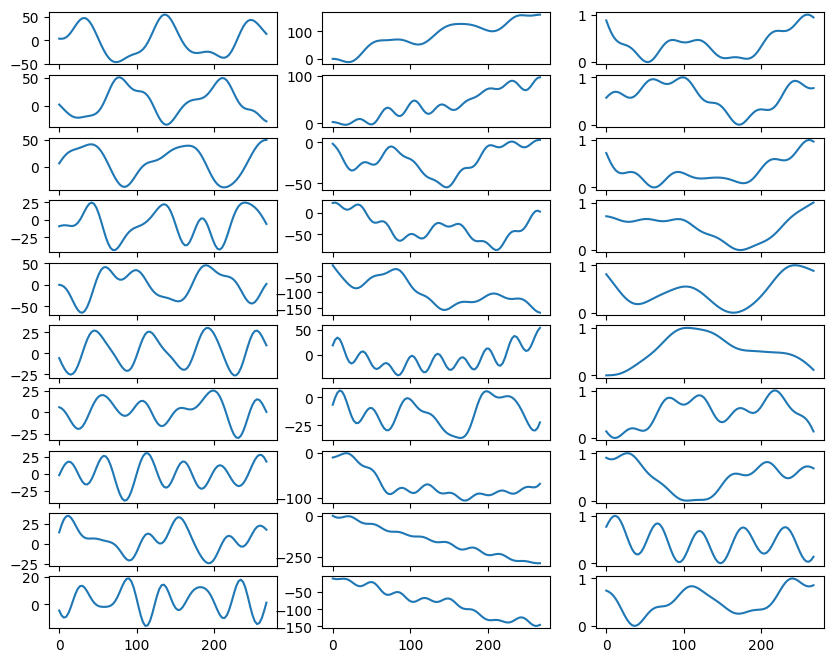

In [10]:
N = 100
M = 1000
L = 50*N*np.pi
harmonics_f = [i/L for i in range(1, M+1)]

harmonic_f_1 = np.random.choice(harmonics_f, 10)
harmonic_f_2 = np.random.choice(harmonics_f, 10)
harmonic_f_3 = np.random.choice(harmonics_f, 10)

x = np.arange(0, 269, 3.0)
print(len(x))
fig, axs = plt.subplots(10, 3, figsize=(10, 8))
for i in range(10):
    f_1 = generate_function(harmonic_f_1)
    y_1 = f_1(x) + np.random.normal(0, 5)
    f_2 = generate_function(harmonic_f_2)
    y_2 = f_2(x) + np.random.normal(0, 5)
    f_3 = generate_function(harmonic_f_3)
    y_3 = f_3(x) + np.random.normal(0, 5)
    X = y_3.reshape(-1, 1)
    transformer = MinMaxScaler().fit(X)
    transformed = transformer.transform(X)
    y_3 = transformed.squeeze()
    axs[i, 0].plot(x, y_1)
    axs[i, 1].plot(x, y_2)
    axs[i, 2].plot(x, y_3)
# plt.plot(x, y, color='green')
# plt.show()